## Author : Priteshkumar Gohil

In [1]:
import numpy as np
from scipy.stats import kurtosis, skew

In [15]:
def PCA(X, dimension):
    X_mean = np.mean(X, axis=1)[np.newaxis].T
#     print(X_mean)
    Y = (X - X_mean) / np.sqrt(X.shape[1]-1)
#     print (Y)
    U, s, Vt = np.linalg.svd(Y)
    W = U[:,0:dimension]
#     print (W.shape)
    X_new = W.T.dot(X)
    return (X_new.reshape(-1))

In [31]:
#requirement your input should be 2d array 
def get_features(data):
    sm = data.sum(axis=0)
    # fmax = np.arange(144).reshape(8,18)
    # np.max(fmax,axis=1)
    mx = np.max(data,axis=0)
    mn = np.min(data,axis=0)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    kur = kurtosis(data, axis=0)
    ske = skew(data, axis=0)
    pca = PCA(data, dimension=1)
    per20 = np.percentile(data, 20, axis=0)
    per40 = np.percentile(data, 40, axis=0)
    per60 = np.percentile(data, 60, axis=0)
    per80 = np.percentile(data, 80, axis=0)
    out = np.stack((sm,mx,mn,mean,std,kur,ske,pca,per20,per40,per60,per80))
    return out.flatten()
#     print(sm.shape,mx.shape,mn.shape,mean.shape,std.shape,kur.shape,ske.shape,pca.shape,per.shape)

In [59]:
import torch
T1 = np.full((18,16) , 1)
P1 = np.full((18,8), 1)
outt = get_features(T1)
outp = get_features(P1)
print(outt.shape, outp.shape)
# out.flatten()
outt = torch.from_numpy(outt)
outp = torch.from_numpy(outp)
cat = torch.cat((outt,outp))

(192,) (96,)


In [60]:
import torch.nn as nn
class tactileNet(nn.Module):
    def __init__(self):
        super(tactileNet,self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(192+96, 64, bias=True), nn.ReLU(inplace=True), nn.Dropout(p = 0.5))
        self.fc2 = nn.Sequential(nn.Linear(64, 16, bias=True), nn.ReLU(inplace=True), nn.Dropout(p = 0.5))
        self.fc3 = nn.Linear(16,1)
    def forward(self, x):
        out = self.fc1(x)
        print(out.shape)
        out = self.fc2(out)
        print(out.shape)
        out = self.fc3(out)
        print(out.shape)
        return out

In [67]:
net = tactileNet()
cat = cat.unsqueeze(0)
net(cat.float())
# cat.float().shape

torch.Size([1, 1, 1, 1, 1, 1, 1, 64])
torch.Size([1, 1, 1, 1, 1, 1, 1, 16])
torch.Size([1, 1, 1, 1, 1, 1, 1, 1])


tensor([[[[[[[[0.2025]]]]]]]], grad_fn=<AddBackward0>)

In [5]:
fmax = np.arange(144).reshape(18,8)
np.min(fmax,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [51]:
np.std(fmax, axis=0)

array([41.50501978, 41.50501978, 41.50501978, 41.50501978, 41.50501978,
       41.50501978, 41.50501978, 41.50501978])

In [24]:
kurtosis(data, axis=0)

array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3.])

In [25]:
skew(fmax, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [52]:
r = np.random.normal(0,0.1,144).reshape(18,8)
skew(r, axis=0)

array([ 0.06671288,  0.28592317,  0.18260017, -0.35017154, -0.4497594 ,
        0.5766031 , -0.22602129, -0.29437105])

In [40]:
kurtosis(r, axis=0)

array([-1.16879607, -1.53918117, -0.93774924, -1.04121522, -1.04266619,
       -0.76705033, -1.25547653, -0.11366499,  1.2697734 , -1.13408169,
       -1.06537218,  0.03215327, -1.57403067, -0.87038575, -0.01439814,
       -0.93865219])

(18, 1)


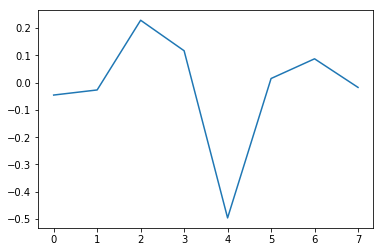

In [76]:
out = PCA(r,1)
import matplotlib.pyplot as plt
# plt.plot(out[0,:],out[1,:])
plt.plot(out[0,:])

In [75]:
out[0,:]

array([-0.04533663, -0.02662693,  0.22902506,  0.11712814, -0.4959474 ,
        0.01531574,  0.08759492, -0.01727629])

In [81]:
np.percentile(fmax, 10, axis=0)

array([13.6, 14.6, 15.6, 16.6, 17.6, 18.6, 19.6, 20.6])

In [86]:
np.percentile(fmax, 20, axis=0)

array([27.2, 28.2, 29.2, 30.2, 31.2, 32.2, 33.2, 34.2])

In [85]:
fmax

array([[  0,   1,   2,   3,   4,   5,   6,   7],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [104, 105, 106, 107, 108, 109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127],
       [128, 129, 130, 131, 132, 133, 134, 135],
       [136, 137, 138, 139, 140, 141, 142, 143]])

In [82]:
frames = np.array([1.2,2.7,3.0,4.0])
# T1[int(frames),:]
frames.astype('int')

array([1, 2, 3, 4])

In [75]:
T1[frames,:]

IndexError: arrays used as indices must be of integer (or boolean) type